In [1]:
import os
from astropy.table import Table


TASSO_DRN = "/Users/aphearin/work/DATA/COSMOS20"
TASSO_BN = "COSMOS2020_Farmer_processed_hlin.fits"
TASSO_FN = os.path.join(TASSO_DRN, TASSO_BN)

repo_drn = "/Users/aphearin/work/repositories/python/cosmos20_colors"
testing_data_drn = os.path.join(repo_drn, "cosmos20_colors/measure_target_data/tests/testing_data")

cat = Table.read(TASSO_FN, format="fits", hdu=1)

sel_galaxies = cat["lp_type"] == 0

imag_cut = 26
sel_hsc_i_mag = cat["HSC_i_MAG"] < imag_cut
cosmos = cat[sel_galaxies&sel_hsc_i_mag]
print(cosmos.keys())

['ID', 'RA', 'DEC', 'CFHT_u_FLUX', 'CFHT_u_FLUXERR', 'CFHT_ustar_FLUX', 'CFHT_ustar_FLUXERR', 'HSC_g_FLUX', 'HSC_g_FLUXERR', 'HSC_r_FLUX', 'HSC_r_FLUXERR', 'HSC_i_FLUX', 'HSC_i_FLUXERR', 'HSC_z_FLUX', 'HSC_z_FLUXERR', 'HSC_y_FLUX', 'HSC_y_FLUXERR', 'UVISTA_Y_FLUX', 'UVISTA_Y_FLUXERR', 'UVISTA_J_FLUX', 'UVISTA_J_FLUXERR', 'UVISTA_H_FLUX', 'UVISTA_H_FLUXERR', 'UVISTA_Ks_FLUX', 'UVISTA_Ks_FLUXERR', 'IRAC_CH1_FLUX', 'IRAC_CH1_FLUXERR', 'IRAC_CH2_FLUX', 'IRAC_CH2_FLUXERR', 'photoz', 'lp_type', 'lp_zp_2', 'lp_zq', 'lp_model', 'lp_age', 'lp_dust', 'lp_Attenuation', 'lp_MFUV', 'lp_MNUV', 'lp_MU', 'lp_MG', 'lp_MR', 'lp_MI', 'lp_MZ', 'lp_MY', 'lp_MJ', 'lp_MH', 'lp_MK', 'lp_mass_med', 'lp_mass_med_min68', 'lp_mass_med_max68', 'lp_mass_best', 'lp_SFR_med', 'CFHT_ustar_MAG', 'CFHT_u_MAG', 'HSC_g_MAG', 'HSC_r_MAG', 'HSC_i_MAG', 'HSC_z_MAG', 'HSC_y_MAG', 'UVISTA_Y_MAG', 'UVISTA_J_MAG', 'UVISTA_H_MAG', 'UVISTA_Ks_MAG', 'IRAC_CH1_MAG', 'IRAC_CH2_MAG']


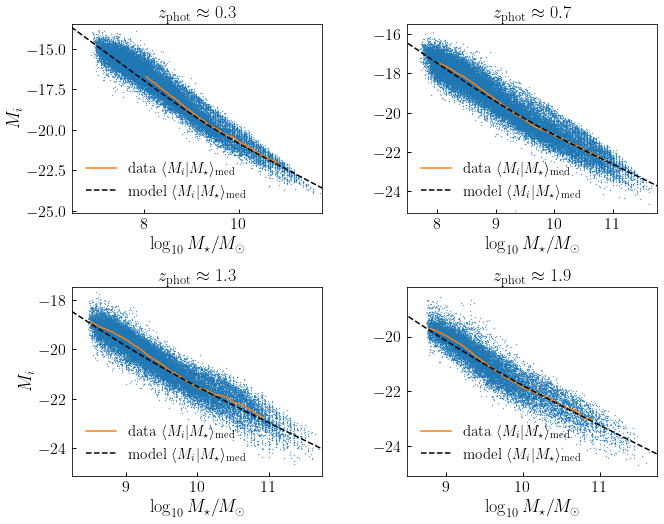

In [2]:
from cosmos20_colors import measure_median_imag
from cosmos20_colors import median_hsc_imag_model
from cosmos20_colors import get_logsm_completeness
from cosmos20_colors.measure_target_data.measure_median_imag_vs_logsm import DELTA_PHZ

logsm_min = 8
logsm_max = 11
logsmarr = np.linspace(5, 20, 500)

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(10, 8))
axes = ax0, ax1, ax2, ax3
fig.tight_layout(pad=5.0)

cut_phz = 0.35
logsm_binmids, median_imag_sample = measure_median_imag(cosmos, imag_cut, cut_phz)

msk_phz = np.abs(cosmos['photoz'] - cut_phz) < DELTA_PHZ
logsm_cut = get_logsm_completeness(cosmos['photoz'], imag_cut)
msk_logsm_complete = cosmos['lp_mass_med'] > logsm_cut
csam = cosmos[msk_phz&msk_logsm_complete]
__=ax0.scatter(csam['lp_mass_med'], csam['lp_MI'], s=0.1)

__=ax0.plot(logsm_binmids, median_imag_sample, color=morange, 
            label=r'${\rm data}\ \langle M_i\vert M_{\star}\rangle_{\rm med}$')
__=ax0.plot(logsmarr, median_hsc_imag_model(logsmarr, cut_phz), '--', color='k',
           label=r'${\rm model}\ \langle M_i\vert M_{\star}\rangle_{\rm med}$')
xlim = ax0.set_xlim(6.5, 11.75)
ylim = ax0.set_ylim(-25.1, -13.5)
title = ax0.set_title(r'$z_{\rm phot}\approx0.3$')

testing_data_bn = "median_imag_target_data_phz_0.35_imag_cut_26.00.dat"
testing_data_fn = os.path.join(testing_data_drn, testing_data_bn)
X = np.loadtxt(testing_data_fn)
a, b = X[:, 0], X[:, 1]
# __=ax0.plot(a, b, '-', color=mred)


cut_phz = 0.75
logsm_binmids, median_imag_sample = measure_median_imag(cosmos, imag_cut, cut_phz)

msk_phz = np.abs(cosmos['photoz'] - cut_phz) < DELTA_PHZ
logsm_cut = get_logsm_completeness(cosmos['photoz'], imag_cut)
msk_logsm_complete = cosmos['lp_mass_med'] > logsm_cut
csam = cosmos[msk_phz&msk_logsm_complete]

__=ax1.scatter(csam['lp_mass_med'], csam['lp_MI'], s=0.1)
__=ax1.plot(logsm_binmids, median_imag_sample, color=morange, 
            label=r'${\rm data}\ \langle M_i\vert M_{\star}\rangle_{\rm med}$')
__=ax1.plot(logsmarr, median_hsc_imag_model(logsmarr, cut_phz), '--', color='k',
           label=r'${\rm model}\ \langle M_i\vert M_{\star}\rangle_{\rm med}$')
xlim = ax1.set_xlim(7.5, 11.75)
ylim = ax1.set_ylim(-25.1, -15.5)
title = ax1.set_title(r'$z_{\rm phot}\approx0.7$')

testing_data_bn = "median_imag_target_data_phz_0.75_imag_cut_26.00.dat"
testing_data_fn = os.path.join(testing_data_drn, testing_data_bn)
X = np.loadtxt(testing_data_fn)
a, b = X[:, 0], X[:, 1]
# __=ax1.plot(a, b, '--', color=mred)

cut_phz = 1.35
logsm_binmids, median_imag_sample = measure_median_imag(cosmos, imag_cut, cut_phz)

msk_phz = np.abs(cosmos['photoz'] - cut_phz) < DELTA_PHZ
logsm_cut = get_logsm_completeness(cosmos['photoz'], imag_cut)
msk_logsm_complete = cosmos['lp_mass_med'] > logsm_cut
csam = cosmos[msk_phz&msk_logsm_complete]

__=ax2.scatter(csam['lp_mass_med'], csam['lp_MI'], s=0.1)
__=ax2.plot(logsm_binmids, median_imag_sample, color=morange, 
            label=r'${\rm data}\ \langle M_i\vert M_{\star}\rangle_{\rm med}$')
__=ax2.plot(logsmarr, median_hsc_imag_model(logsmarr, cut_phz), '--', color='k',
           label=r'${\rm model}\ \langle M_i\vert M_{\star}\rangle_{\rm med}$')
xlim = ax2.set_xlim(8.25, 11.75)
ylim = ax2.set_ylim(-25.1, -17.5)
title = ax2.set_title(r'$z_{\rm phot}\approx1.3$')

testing_data_bn = "median_imag_target_data_phz_1.35_imag_cut_26.00.dat"
testing_data_fn = os.path.join(testing_data_drn, testing_data_bn)
X = np.loadtxt(testing_data_fn)
a, b = X[:, 0], X[:, 1]
# __=ax2.plot(a, b, '--', color=mred)

cut_phz = 1.95
logsm_binmids, median_imag_sample = measure_median_imag(cosmos, imag_cut, cut_phz)

msk_phz = np.abs(cosmos['photoz'] - cut_phz) < DELTA_PHZ
logsm_cut = get_logsm_completeness(cosmos['photoz'], imag_cut)
msk_logsm_complete = cosmos['lp_mass_med'] > logsm_cut
csam = cosmos[msk_phz&msk_logsm_complete]

__=ax3.scatter(csam['lp_mass_med'], csam['lp_MI'], s=0.1)
__=ax3.plot(logsm_binmids, median_imag_sample, color=morange, 
            label=r'${\rm data}\ \langle M_i\vert M_{\star}\rangle_{\rm med}$')
__=ax3.plot(logsmarr, median_hsc_imag_model(logsmarr, cut_phz), '--', color='k', 
           label=r'${\rm model}\ \langle M_i\vert M_{\star}\rangle_{\rm med}$')
xlim = ax3.set_xlim(8.5, 11.75)
ylim = ax3.set_ylim(-25.1, -18.2)
title = ax3.set_title(r'$z_{\rm phot}\approx1.9$')

testing_data_bn = "median_imag_target_data_phz_1.95_imag_cut_26.00.dat"
testing_data_fn = os.path.join(testing_data_drn, testing_data_bn)
X = np.loadtxt(testing_data_fn)
a, b = X[:, 0], X[:, 1]
# __=ax3.plot(a, b, '--', color=mred)

for ax in axes:
    xlabel = ax.set_xlabel(r'$\log_{10}M_{\star}/M_{\odot}$')
    leg = ax.legend(loc='lower left')
ylabel = ax0.set_ylabel(r'$M_i$')
ylabel = ax2.set_ylabel(r'$M_i$')

fig.savefig('median_imag_vs_mstar.png', bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight', dpi=200) 